Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**survival:    Survival
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation
titanic_df.describe()**


In [12]:
#Aref - updated for USGS Earthquakes dataset 

In [13]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
# from sklearn import linear_model
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

In [14]:
titanic_df = pd.read_csv("earthquakes-death.csv")


In [15]:
titanic_df.head

<bound method NDFrame.head of            id  tsunami    year   eq  region   deaths
0      7614.0      0.0  2007.0  1.6   150.0      3.0
1     10036.0      0.0  2013.0  2.1   150.0     14.0
2     10330.0      0.0  2018.0  2.1    10.0      7.0
3     10317.0      0.0  2017.0  3.2    60.0      1.0
4      8492.0      0.0  2009.0  3.4    30.0      2.0
5      7221.0      0.0  1982.0  3.5   150.0     10.0
6      9887.0      0.0  2011.0  3.5    60.0      2.0
7      8792.0      0.0  2009.0  3.5    10.0      2.0
8     10126.0      0.0  2015.0  3.6   130.0      4.0
9      5275.0      0.0  1991.0  3.8   120.0      9.0
10     5261.0      0.0  1990.0  4.0    10.0     10.0
11     4934.0      0.0  1981.0  4.0    60.0      6.0
12    10289.0      0.0  2017.0  4.0   140.0      1.0
13     5793.0      0.0  2004.0  4.0   140.0      1.0
14     4884.0      0.0  1980.0  4.0   130.0      1.0
15    10331.0      0.0  2018.0  4.1   120.0      5.0
16     8208.0      0.0  2008.0  4.1   110.0      2.0
17     7601.0   

In [16]:
titanic_df['tsunami']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
1609    1.0
1610    1.0
1611    1.0
1612    1.0
1613    0.0
1614    1.0
1615    1.0
1616    1.0
1617    1.0
1618    1.0
1619    1.0
1620    1.0
1621    1.0
1622    0.0
1623    1.0
1624    1.0
1625    1.0
1626    1.0
1627    1.0
1628    1.0
1629    1.0
1630    0.0
1631    1.0
1632    1.0
1633    1.0
1634    1.0
1635    1.0
1636    1.0
1637    1.0
1638    1.0
Name: tsunami, Length: 1639, dtype: float64

In [17]:
#titanic_df['cancelled'] = titanic_df['cancelled'].map({'cancelyes': 1.0, 'cancelno': 0.0})
titanic_df.head

<bound method NDFrame.head of            id  tsunami    year   eq  region   deaths
0      7614.0      0.0  2007.0  1.6   150.0      3.0
1     10036.0      0.0  2013.0  2.1   150.0     14.0
2     10330.0      0.0  2018.0  2.1    10.0      7.0
3     10317.0      0.0  2017.0  3.2    60.0      1.0
4      8492.0      0.0  2009.0  3.4    30.0      2.0
5      7221.0      0.0  1982.0  3.5   150.0     10.0
6      9887.0      0.0  2011.0  3.5    60.0      2.0
7      8792.0      0.0  2009.0  3.5    10.0      2.0
8     10126.0      0.0  2015.0  3.6   130.0      4.0
9      5275.0      0.0  1991.0  3.8   120.0      9.0
10     5261.0      0.0  1990.0  4.0    10.0     10.0
11     4934.0      0.0  1981.0  4.0    60.0      6.0
12    10289.0      0.0  2017.0  4.0   140.0      1.0
13     5793.0      0.0  2004.0  4.0   140.0      1.0
14     4884.0      0.0  1980.0  4.0   130.0      1.0
15    10331.0      0.0  2018.0  4.1   120.0      5.0
16     8208.0      0.0  2008.0  4.1   110.0      2.0
17     7601.0   

In [18]:
data = titanic_df.drop(columns=["id", "year"])
data.sample(10)

,tsunami,eq,region,deaths
882,0.0,6.5,30.0,15.0
906,0.0,6.5,170.0,2.0
461,0.0,5.9,130.0,4.0
615,0.0,6.1,140.0,5.0
1259,0.0,7.2,60.0,3.0
233,0.0,5.4,40.0,1.0
1175,0.0,7.0,150.0,20.0
1337,0.0,7.4,30.0,12000.0
358,0.0,5.7,140.0,3.0
1562,1.0,8.0,150.0,49.0


Mean Deaths


<Figure size 1224x720 with 0 Axes>

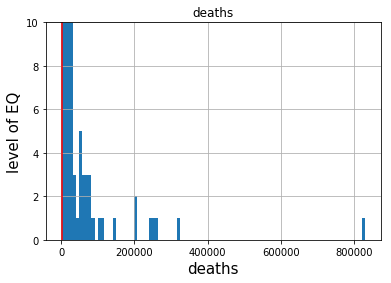

In [19]:
fig=plt.figure(figsize=(17,10))
data.hist(column="deaths", bins=100)
plt.xlabel("deaths",fontsize=15)
plt.ylabel("level of EQ",fontsize=15)
#plt.xlim([0.0,100000.0])
plt.ylim([0,10])

plt.axvline(data["deaths"].mean(), color="red")
print('Mean Deaths'.format(data["deaths"].mean()))


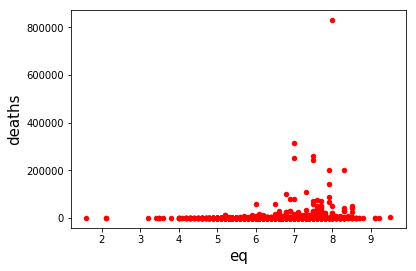

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
#data.hist(column="deaths", bins=10000)

# a scatter plot comparing quake level and deaths
titanic_df.plot(kind='scatter',x='eq',y='deaths',color='red')
plt.xlabel("eq",fontsize=15)
plt.ylabel("deaths",fontsize=15)
plt.show()

In [ ]:
data_nona = data["deaths"].fillna(data["deaths"].mean())
data["deaths"]=data_nona
data.head(10)

In [ ]:
# data.info()

# Decision Tree Algorithm

In [ ]:
target = data["tsunami"]
target_names = ["yes", "no"]

In [ ]:
variable = data.drop("tsunami", axis=1)
feature_names = variable.columns
variable.head

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(variable, target, random_state=42)

In [ ]:
# y_test is what the outcome is, and y_predict is what the decision tree predicts it. 
#y_test is the survive column entries, and X_test the rest of the columns or the 
# variables we think affect the survivie. 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test) 

In [ ]:
y_predict = clf.predict(X_test)
y_predict.shape
clf.score(X_train,y_train)

# Random forest Algorithm

In [ ]:
# Create a random forest classifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(variable, target)
rf.score(variable, target)
# Have not done the cross validation

In [ ]:
y_test

In [ ]:
rf.score(X_test, y_test)


In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

In [ ]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

# Support Vector Machine
With Radial-basis-function kernel

In [ ]:
from sklearn.svm import SVC 
# using X_train, X_test, y_train, y_test
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
# compare y_predict to y_test

In [ ]:
# if good prediction, what is y_predict - y_test = 0 

In [ ]:
accuracy = model.score(X_test, y_test)
print(accuracy)

In [ ]:
# How do I assess accuracy
model.score(X_train, y_train)


# Support Vector Machine with Polynomial Kernel 

In [ ]:
# from sklearn.svm import SVC 
# # using X_train, X_test, y_train, y_test
# model = SVC(kernel='pol')
# model.fit(X_train, y_train)
# y_predict = model.predict(X_test)
# # compare y_predict to y_test

In [ ]:
# accuracy = model.score(X_test, y_test)
# print(accuracy)

In [ ]:
# # How do I assess accuracy
# model.score(X_train, y_train)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head()

# K Nearest Neighbor

In [ ]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
ac2_knn = round(knn.score(X_test, y_test) * 100, 2)

print(acc_knn)

In [ ]:
print(ac2_knn)